<a href="https://colab.research.google.com/github/mnunezmartinez/08MBID---Visualizacion-de-Datos/blob/main/Malena_Nunez_08MBID_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar los modulos

import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# sibsp = hermanos / conyugues
# parch = padres / abuelos

In [5]:
# Informacion del dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
# Renombrar columnas

titanic.rename(columns={'class':'clase'},inplace=True)
titanic.rename(columns={'fare':'tarifa'},inplace=True)

# Mostrar valores unicos (clases)
#titanic['class'].unique()
titanic.clase.unique()

# Primeras 5 filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Añadir columna is_old, is_baby

#Función
def is_old_func(row):
  return row['age'] > 60 #Booleano

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

titanic.eval('is_baby = age < 15', inplace = True)

In [8]:
# Imprimir el dataset
titanic

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,False


In [9]:
# Columna class_num

def class_num_func(row):
  clase = {'Third':3, 'First':1, 'Second':2}
  return clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [10]:
# Imprimir
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [11]:
# Query
titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First','Third'])) & (titanic.age > 45) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

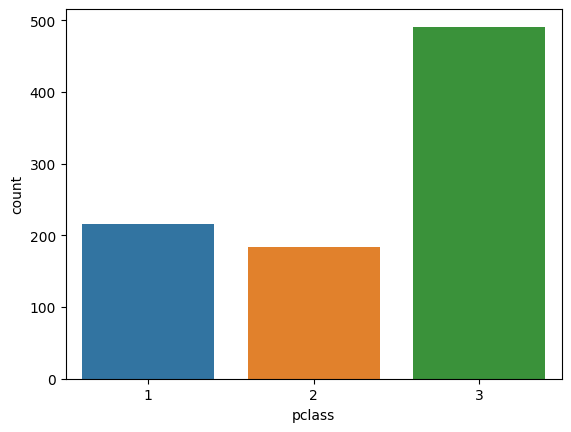

In [12]:
# Distribución de la variable clase
sns.countplot(x='pclass',data=titanic)

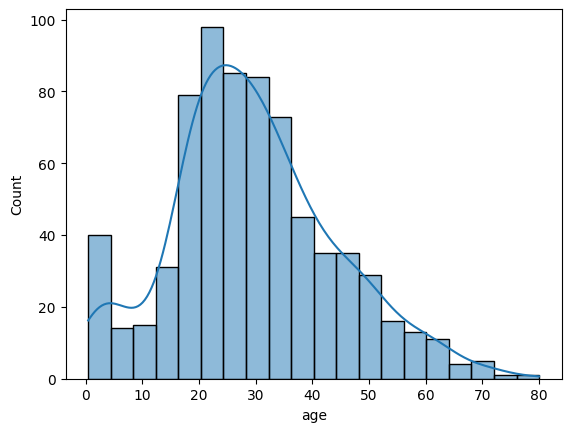

In [13]:
# Distribución basado en histogramas por la edad
sns.histplot(titanic.age.dropna(), kde=True)

# Hacemos un dropna() para no contemplar los valores nulos en el histograma
# kde = lineas suvizadas

plt.show()

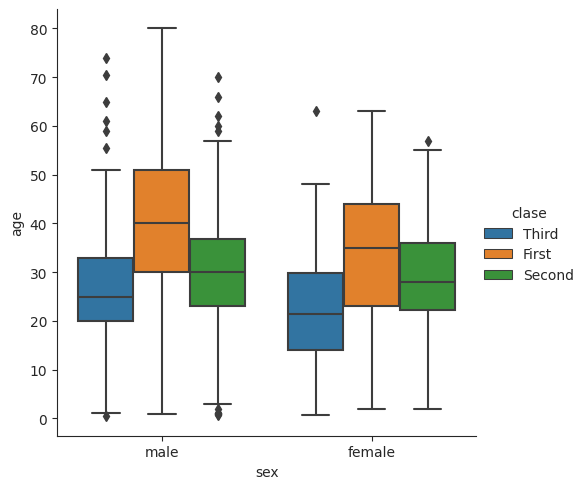

In [14]:
# Boxplot edad vs seco
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x='sex', y='age', hue='clase', kind = 'box')

# with = Para garantizar una correcta gestión de los recursos y asegurarse de que se realicen las acciones necesarias antes y después de la ejecución de un bloque de código.
#        En este caso es que una vez que se termina de ejecutar el bloque de código, el estilo se restablece automáticamente a su valor original
# Nos va acrear 3 diagramas de caja por cada sexo (hue = clase)

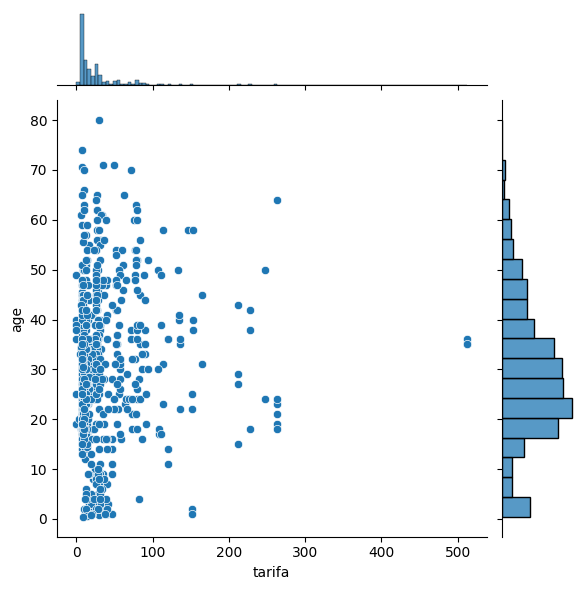

In [15]:
# Distribución crizada
sns.jointplot(x='tarifa', y='age', data=titanic)

a)  Hay un camarote muy exclusivo  
b) A los dos *outliers* les han timado  
c) Son datos erróneos  

Podemos determinar que las personas mayores no pagan una tarifa desorbitada.

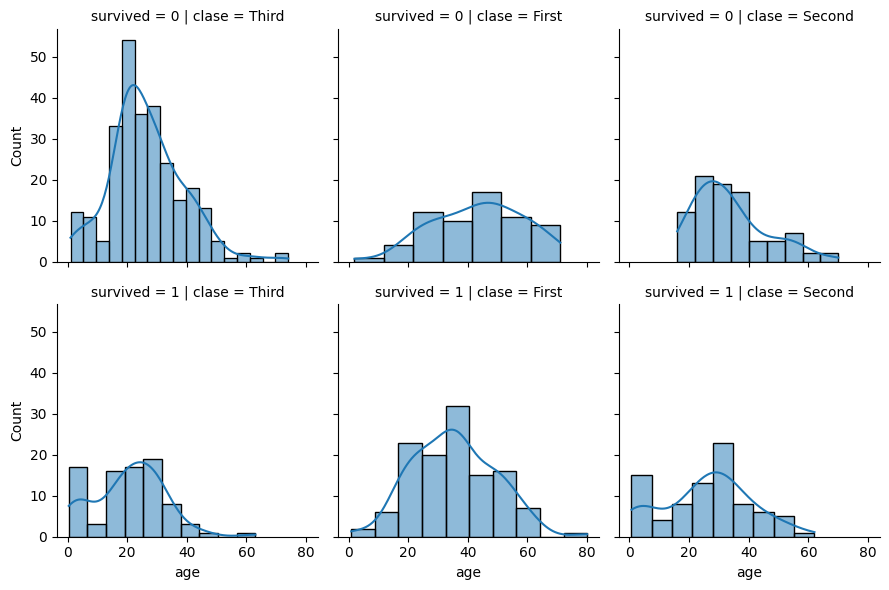

In [19]:
# Matriz de gráficos
g = sns.FacetGrid(titanic, row='survived', col='clase')
g.map(sns.histplot, 'age', kde=True) # Por cada celda del gráfico creamos un histograma
plt.show()

Enfrentamos la edad con el conteo de pasajeros.


Los pasajeros que no han sobrevivido y son de tercera clase: La mayoría de los fallecimientos son de personas de media edad (aprox 40).

¿Los señores mayores han sobrevivido o es que no hay? Para saberlo miramos el segundo gráfico. Resulta que no hay personas mayores en tecera clase.

Los niños si han sobrevivido, porque las curvas son diferentes.

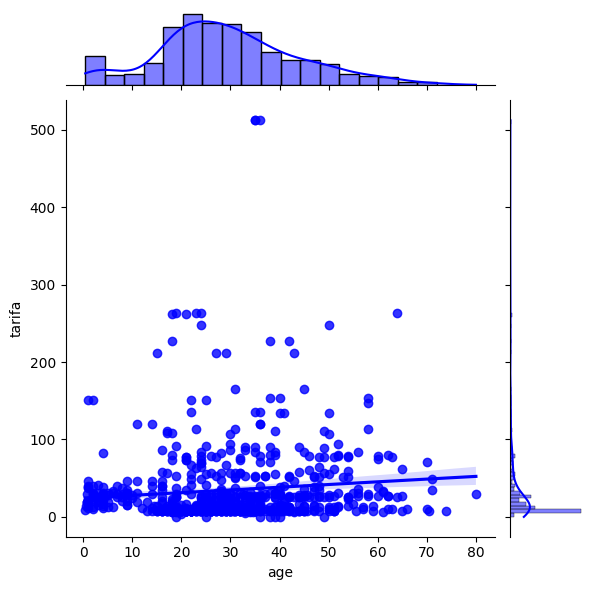

In [ ]:
# Diagrama de dispersión
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

<ipython-input-35-61d1b877940f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

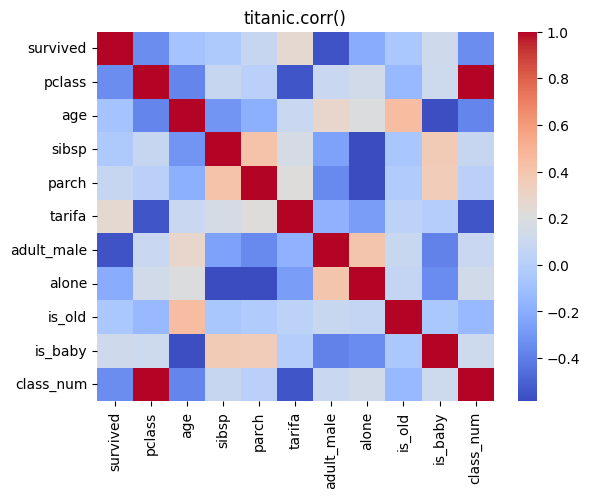

In [ ]:
# Diagrama de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

**IMPORTANTE:**
No se puede realizar una correlación sin haber tratado los datos. Es necesario normalizarlos.

**PROBLEMA:** Estandarizar en base a todas las columnas es erróneo. Es mejor seleccionar primero las columnas útiles para el estudio.

ValueError: ignored

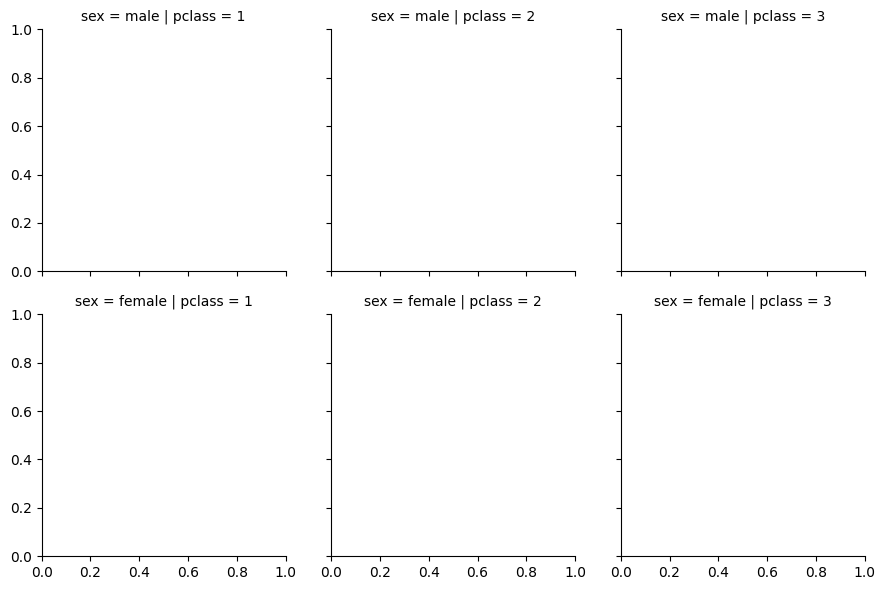

In [32]:
# Matriz de gráficos
g = sns.FacetGrid(titanic, row='sex', col='pclass')
g.map(sns.histplot, 'age', hue='survived', multiple="stack")
plt.show()

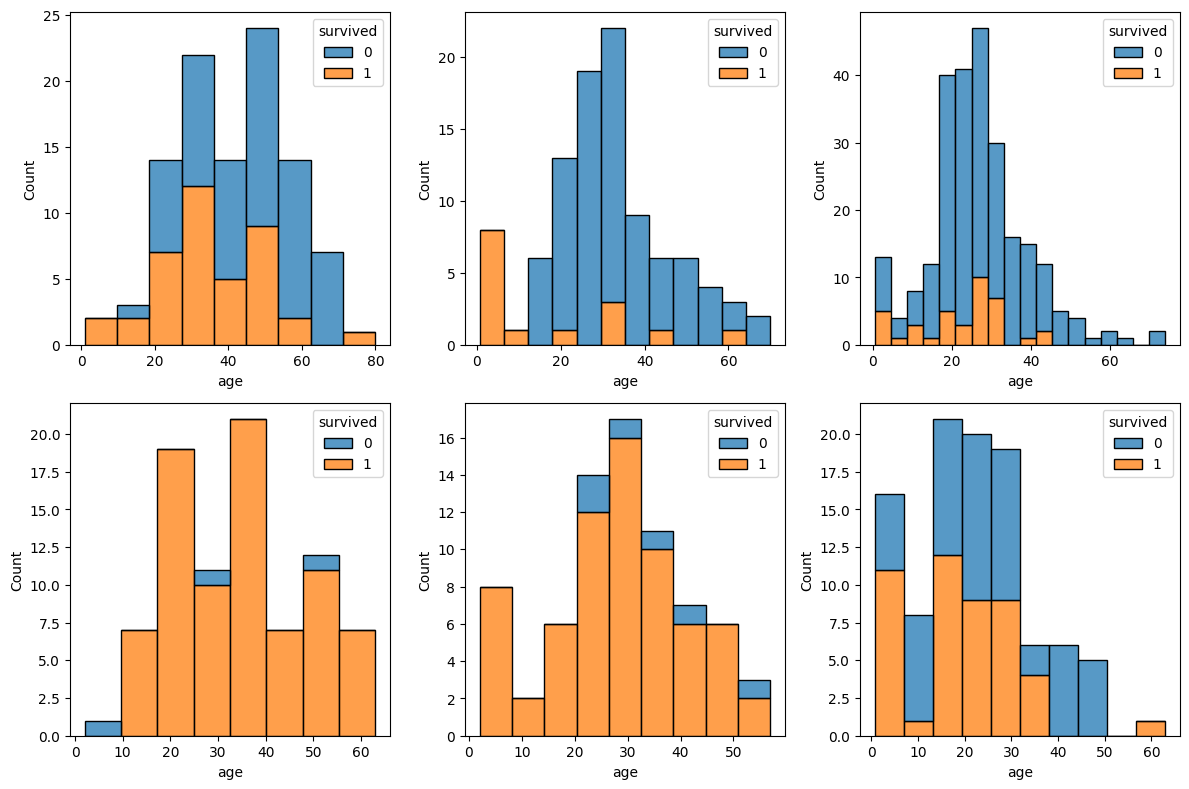

In [33]:
# Crear una figura con una matriz de gráficos
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterar sobre las combinaciones de sex y pclass
for i, sex in enumerate(['male', 'female']):
    for j, pclass in enumerate([1, 2, 3]):
        # Filtrar los datos por sex y pclass
        subset = titanic[(titanic['sex'] == sex) & (titanic['pclass'] == pclass)]

        # Crear el gráfico de histograma con hue
        sns.histplot(data=subset, x='age', hue='survived', multiple="stack", ax=axes[i, j])

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<Axes: xlabel='age', ylabel='Count'>

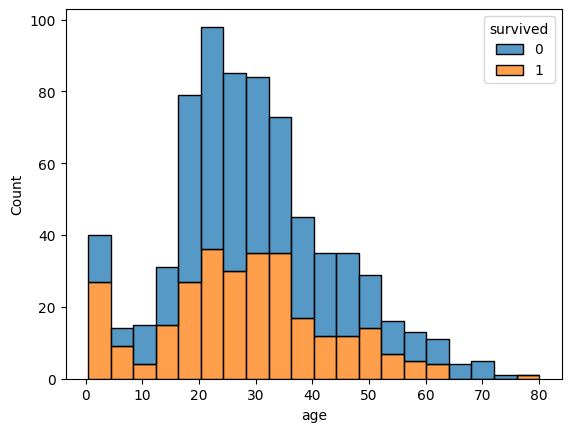

In [28]:
sns.histplot(data=titanic, x='age', hue='survived', multiple="stack")

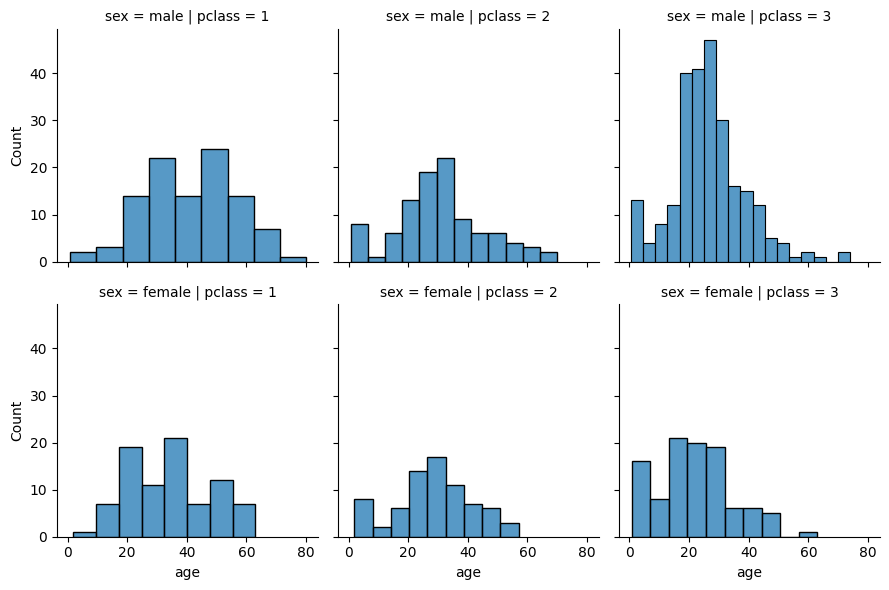

In [30]:
# Matriz de gráficos
g = sns.FacetGrid(titanic, row='sex', col='pclass')
g.map(sns.histplot, 'age')
plt.show()